# Analysis of audio signals by the Fourier series

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Plotting Signals

In [2]:
def plot_ct_signal(t, x_t, x_label='Time [s]', y_label='Signal'):
    plt.grid(ls='--')
    plt.axhline(y=0, color='k', linewidth=1)
    plt.axvline(x=0, color='k', linewidth=1)
    plt.plot(t, x_t, c='tab:blue')
    plt.rcParams["figure.figsize"] = (15, 10)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    pass

In [3]:
def plot_dt_signal(n, x_n, x_label='Frequency [hz]', y_label='Fourier Series Coefficients'):
    plt.grid(ls='--')
    plt.axhline(y=0, color='k', linewidth=1)
    plt.axvline(x=0, color='k', linewidth=1)
    plt.rcParams["figure.figsize"] = (15, 10)
    
    input_size = len(n)
    for i in range(input_size):
        plt.plot([n[i], n[i]], [0, x_n[i]], c='tab:blue')
    plt.scatter(n, x_n, c='tab:blue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    pass

## Question 1

In [4]:
def ak(x_t, t, k, T):
   a = x_t*np.exp(-1j*2*k*np.pi*t/T)
   return a.sum()/a.size

def get_ak(x_t, t, T, k_start, k_end):
    return np.array([ak(x_t, t, k, T).real for k in range(k_start, k_end+1)])

In [5]:
def estimate_x_t(x_t, t, T, sigma_start, sigma_end):
   estimation = np.array(
       [ak(x_t, t, k, T)*np.exp(1j*2*k*np.pi*t/T)
        for k in range(sigma_start, sigma_end+1)]
   )
   return estimation.sum(axis=0).real

### Estimating y1

In [6]:
def y1(step=0.01):
    samples = int(1/step)
    t = np.arange(-2, 2, step=step)
    y_t = np.zeros((4)*samples)
    for i in range(samples):
        y_t[samples+i+1] = t[samples+i+1]+1
        y_t[3*samples-i]= t[samples+i+1]+1
    t=np.append(t-4, np.append(t,t+4))
    y_t=np.append(y_t, np.append(y_t, y_t))
    return t,y_t

In [7]:
t1, yt1 = y1()

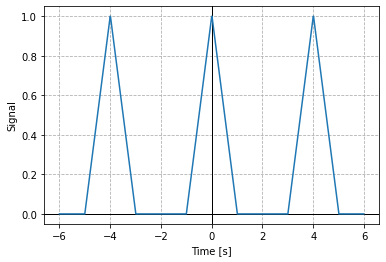

In [8]:
plot_ct_signal(t1, yt1)

#### a.  0<k<2

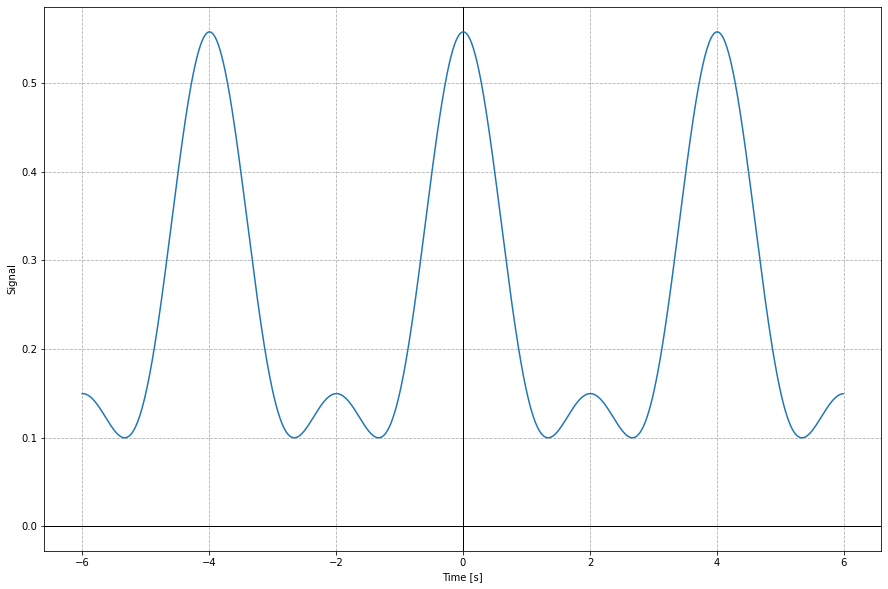

In [9]:
plot_ct_signal(t1,estimate_x_t(yt1, t1, 4, 0, 2))

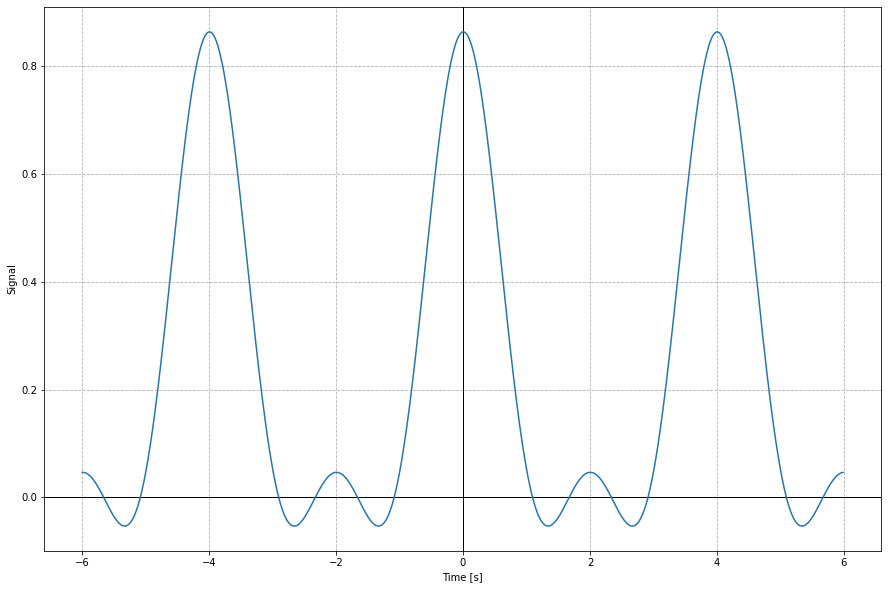

In [10]:
plot_ct_signal(t1,estimate_x_t(yt1, t1, 4, -2, 2))

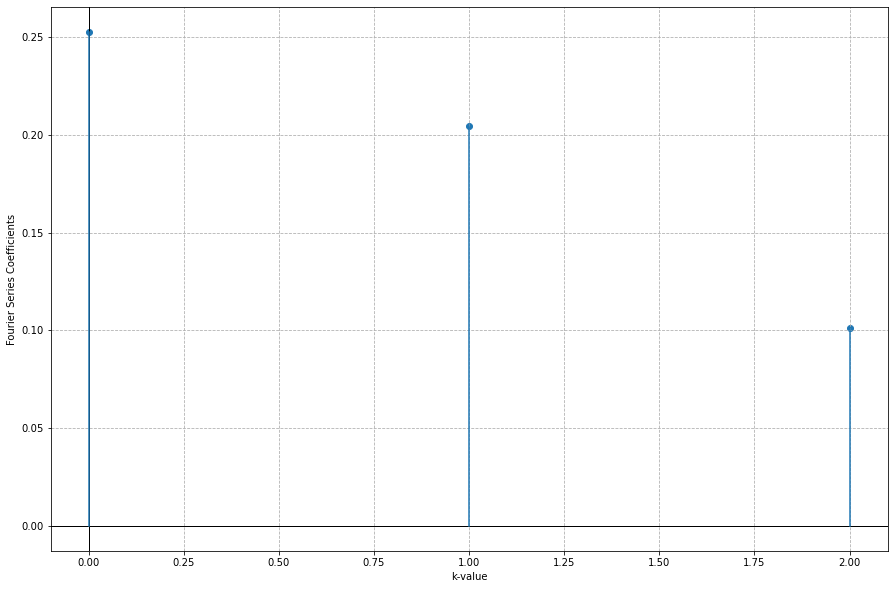

In [11]:
plot_dt_signal(np.arange(0, 3 ,1), get_ak(yt1, t1, 4, 0, 2) ,x_label='k-value')

#### b. 0<k<10

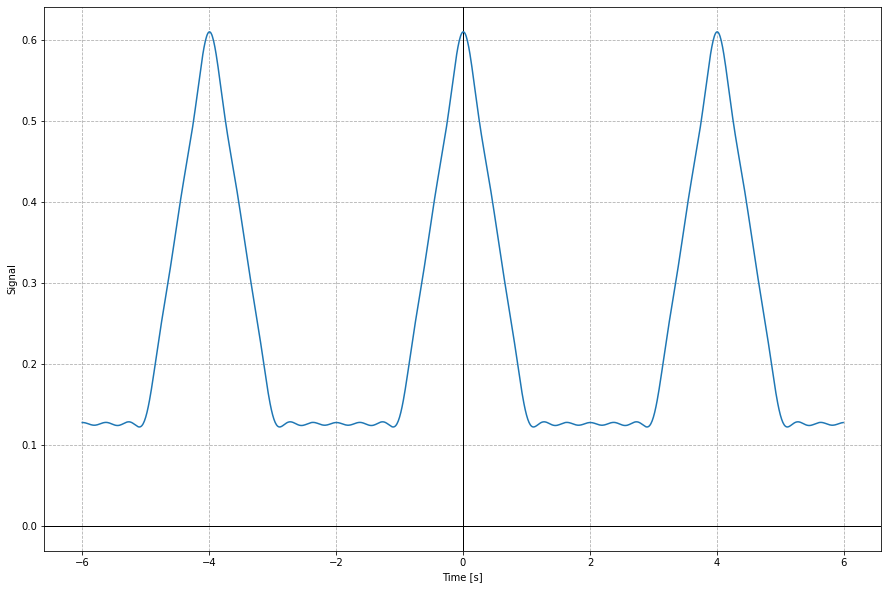

In [12]:
plot_ct_signal(t1,estimate_x_t(yt1, t1, 4, 0, 10))

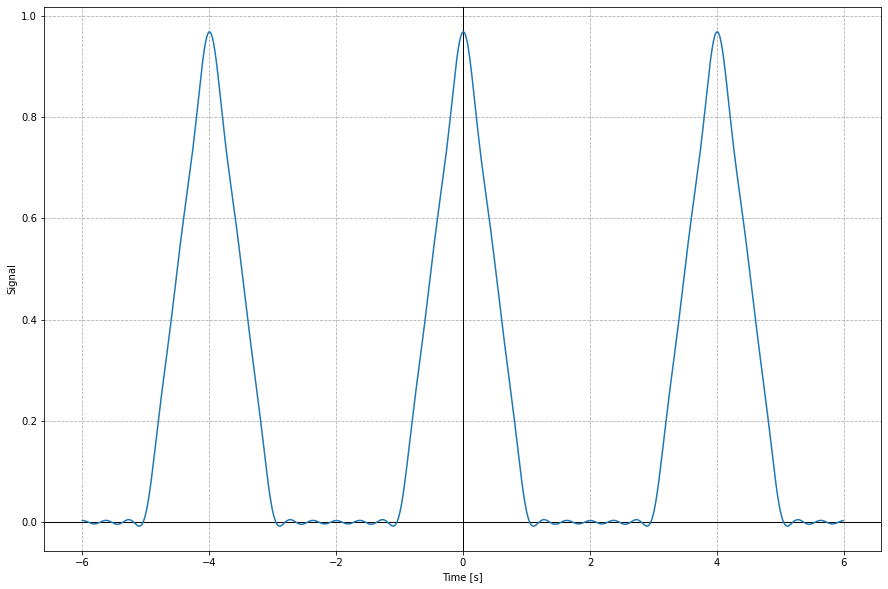

In [13]:
plot_ct_signal(t1,estimate_x_t(yt1, t1, 4, -10, 10))

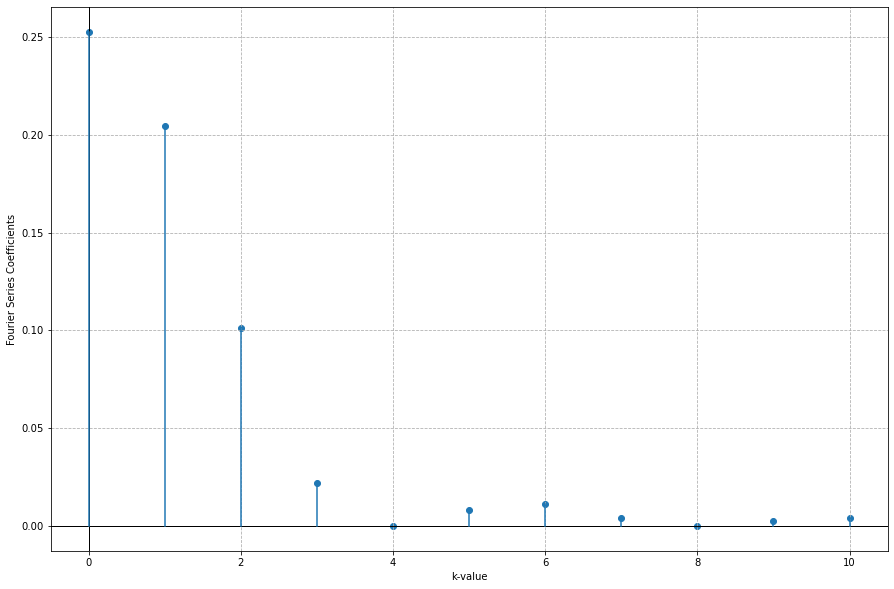

In [14]:
plot_dt_signal(np.arange(0, 11 ,1), get_ak(yt1, t1, 4, 0, 10) ,x_label='k-value')

#### c. 0<k<50

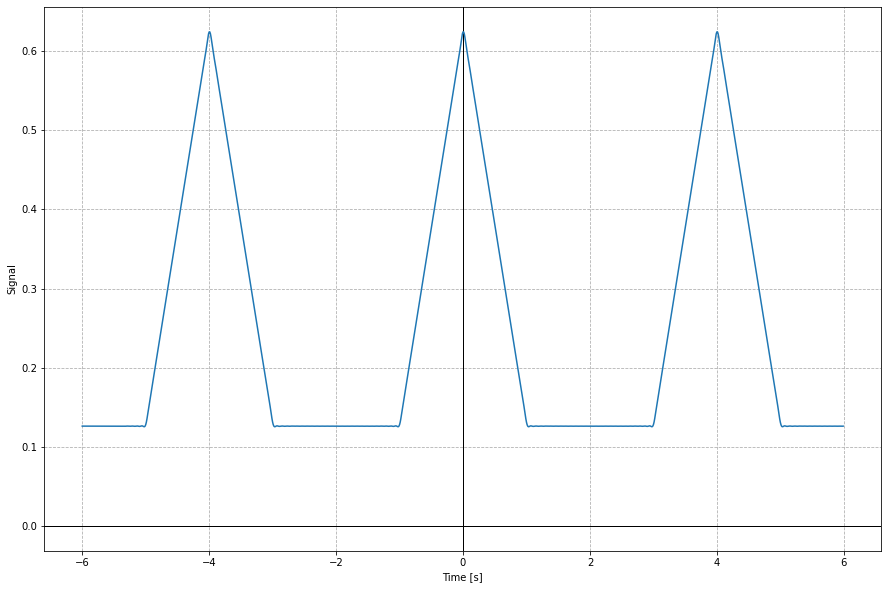

In [15]:
plot_ct_signal(t1,estimate_x_t(yt1, t1, 4, 0, 50))

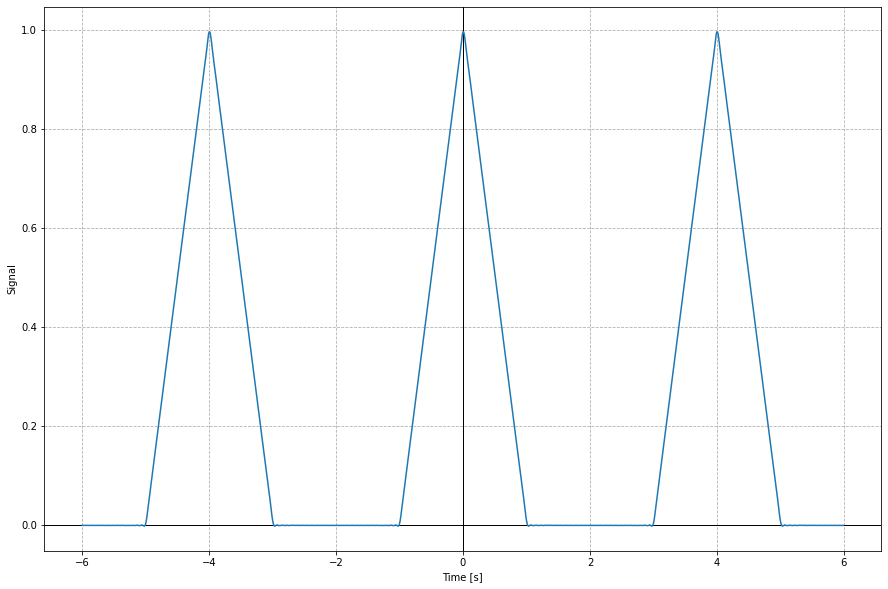

In [16]:
plot_ct_signal(t1,estimate_x_t(yt1, t1, 4, -50, 50))

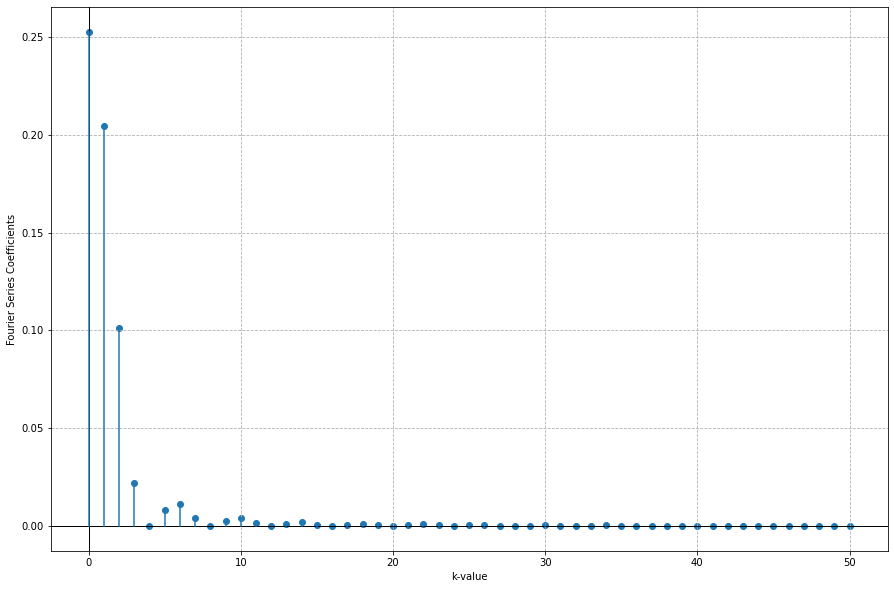

In [17]:
plot_dt_signal(np.arange(0, 51 ,1), get_ak(yt1, t1, 4, 0, 50) ,x_label='k-value')

#### d. 100<k<200

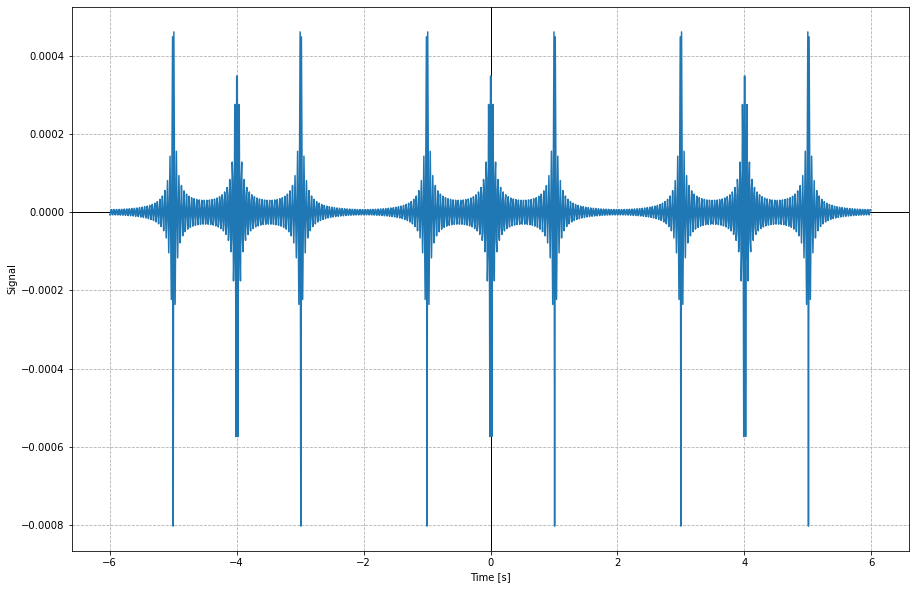

In [18]:
plot_ct_signal(t1,estimate_x_t(yt1, t1, 4, 100, 200))

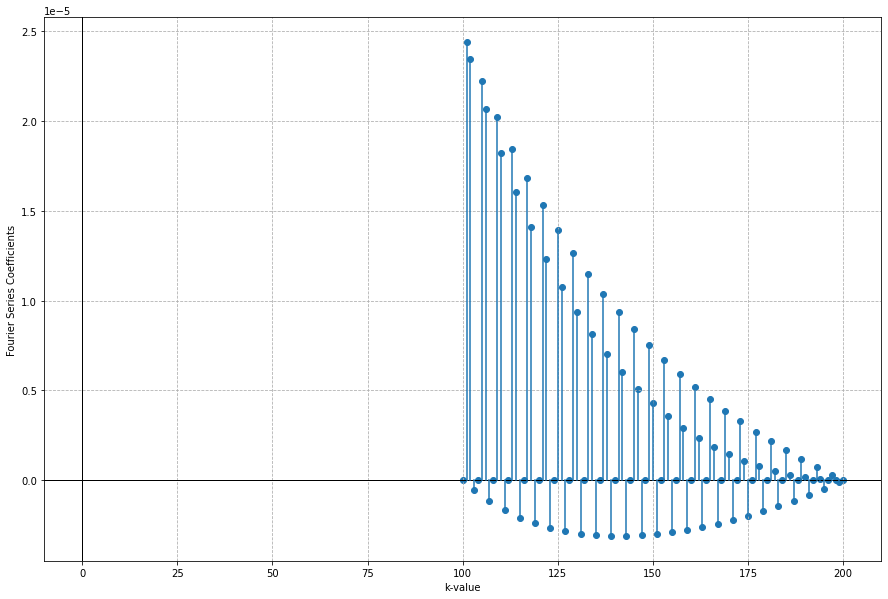

In [19]:
plot_dt_signal(np.arange(100, 201 ,1), get_ak(yt1, t1, 4, 100, 200) ,x_label='k-value')

### Estimating y2

In [20]:
def y2(step=0.01):
    samples = int(1/step)
    t = np.arange(-2, 2, step=step)
    y_t = np.zeros((4)*samples)
    for i in range(4*samples):
        y_t[i] = t[i]
    t=np.append(t-4, np.append(t,t+4))
    y_t=np.append(y_t, np.append(y_t, y_t))
    return t,y_t

In [21]:
t2, yt2 = y2()

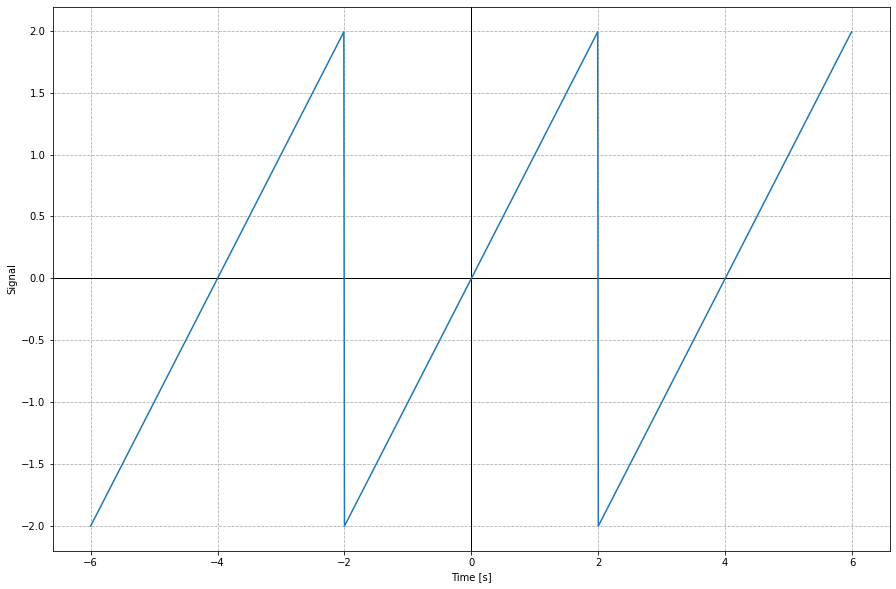

In [22]:
plot_ct_signal(t2, yt2)

#### a. 0<k<2

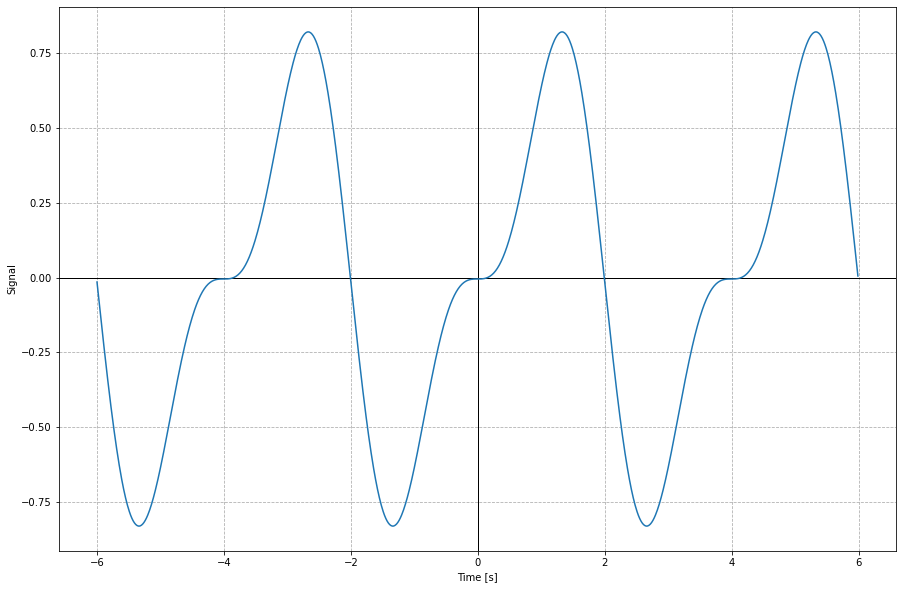

In [23]:
plot_ct_signal(t2,estimate_x_t(yt2, t2, 4, 0, 2))

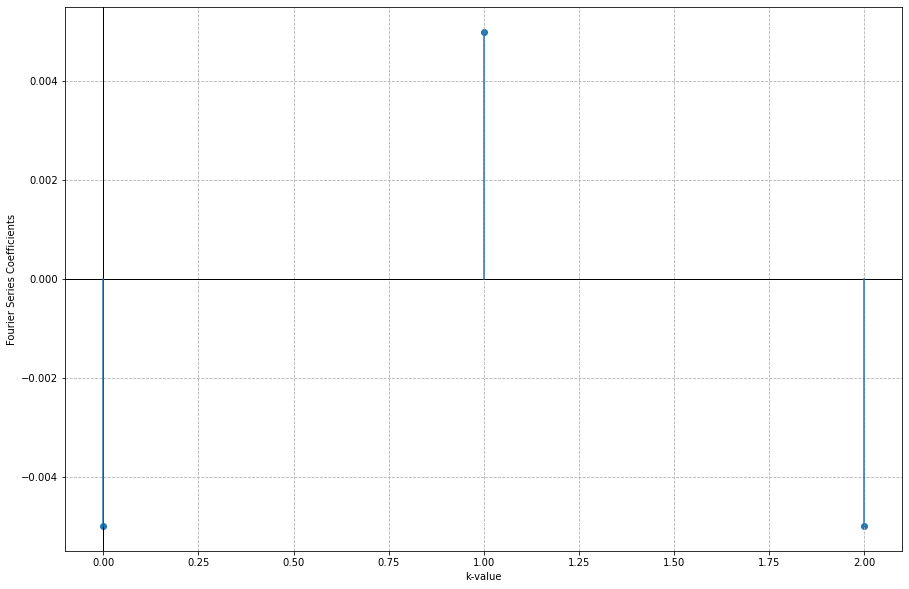

In [24]:
plot_dt_signal(np.arange(0, 3 ,1), get_ak(yt2, t2, 4, 0, 2) ,x_label='k-value')

#### b. 0<k<10

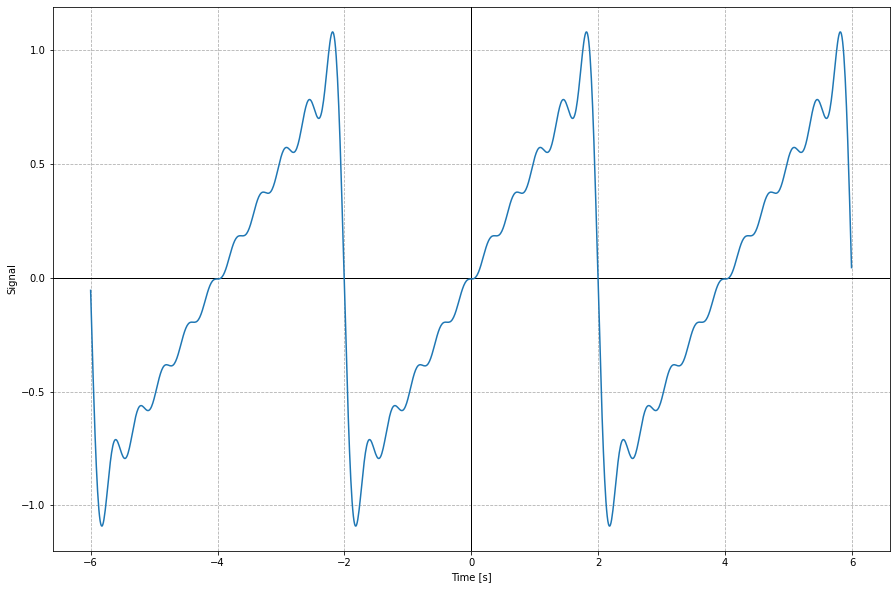

In [25]:
plot_ct_signal(t2,estimate_x_t(yt2, t2, 4, 0, 10))

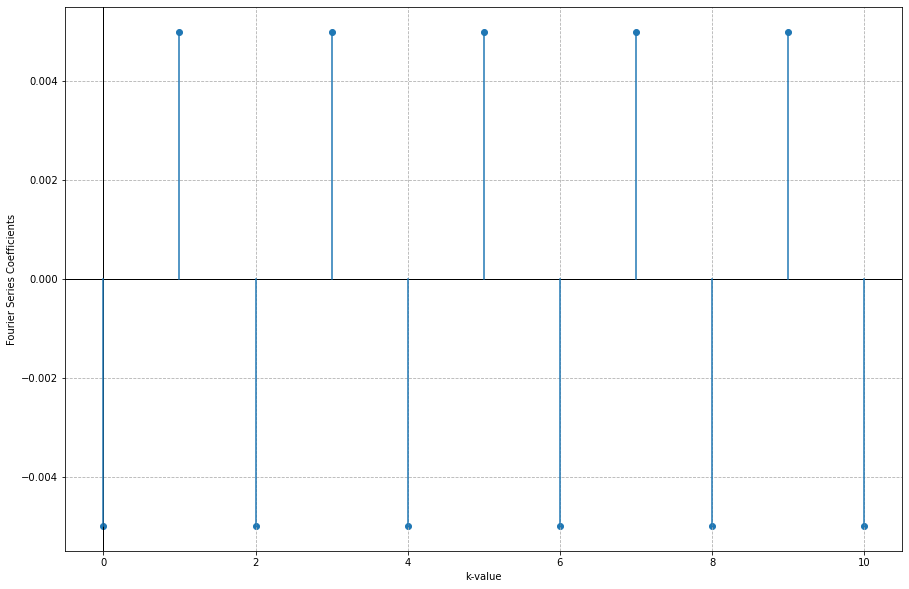

In [26]:
plot_dt_signal(np.arange(0, 11 ,1), get_ak(yt2, t2, 4, 0, 10) ,x_label='k-value')

#### c. 0<k<50

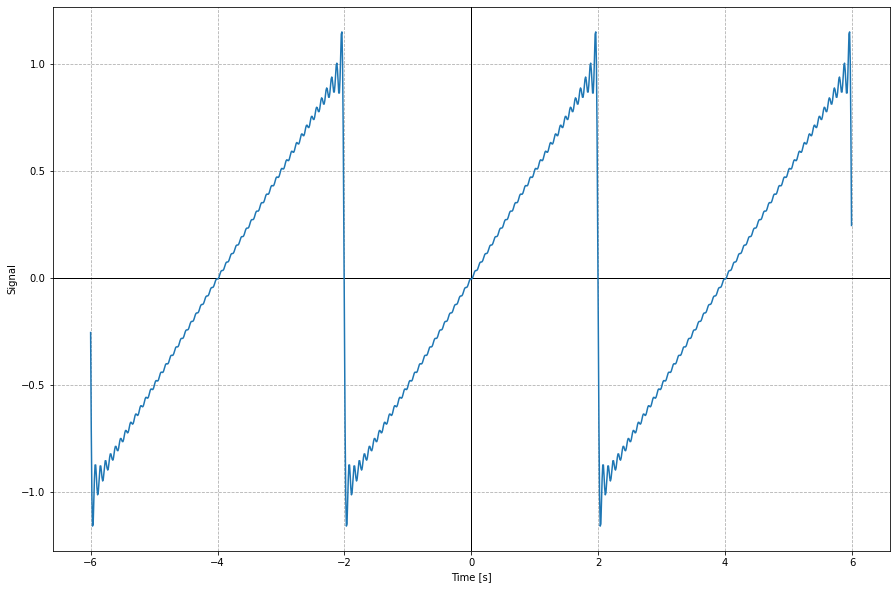

In [27]:
plot_ct_signal(t2,estimate_x_t(yt2, t2, 4, 0, 50))

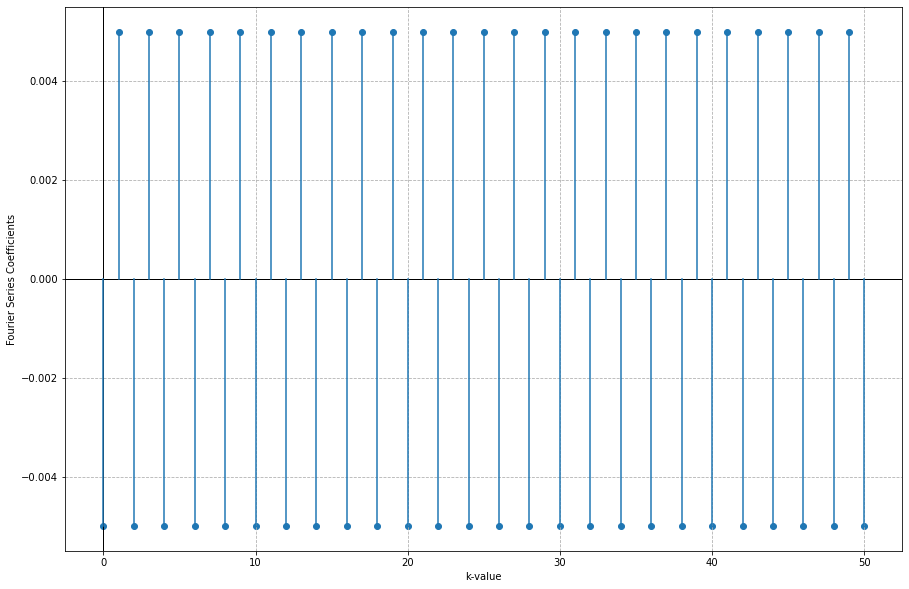

In [28]:
plot_dt_signal(np.arange(0, 51 ,1), get_ak(yt2, t2, 4, 0, 50) ,x_label='k-value')

#### d. 100<k<200

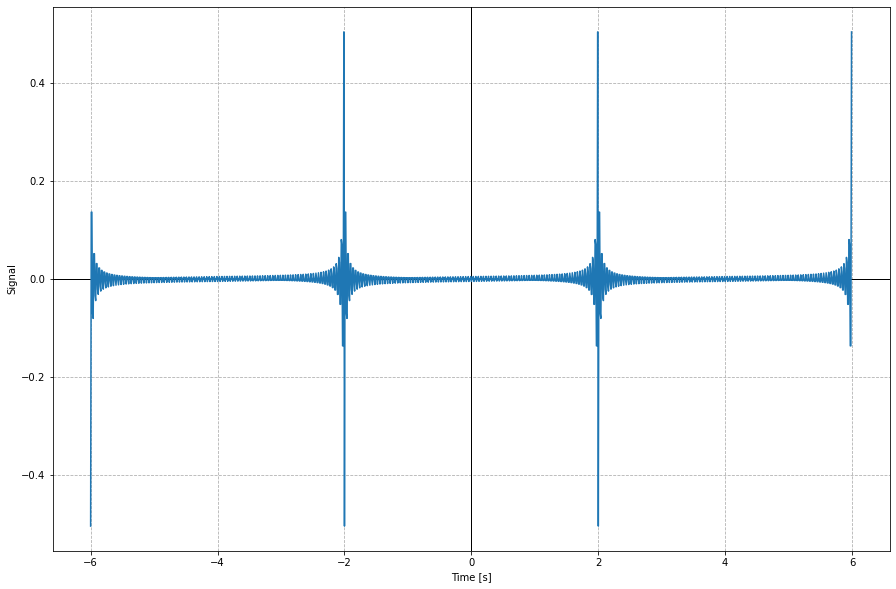

In [29]:
plot_ct_signal(t2,estimate_x_t(yt2, t2, 4, 100, 200))

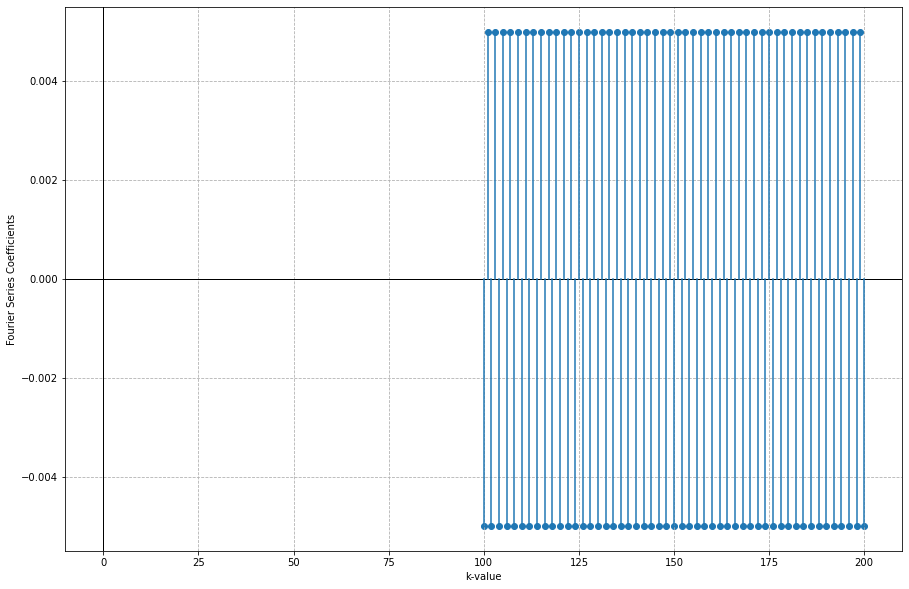

In [30]:
plot_dt_signal(np.arange(100, 201 ,1), get_ak(yt2, t2, 4, 100, 200) ,x_label='k-value')

## Question 2: Working with the audio signal

In [31]:
from scipy.io import wavfile

In [32]:
sample_rate, data = wavfile.read('sound.wav')
sample_step = 1. / sample_rate
length = data.shape[0] / sample_rate

### a. Plotting the first 1000 samples of the signal in seconds

In [33]:
t = (np.arange(0, length , step=sample_step))[:1000]
x_t = data[:1000]

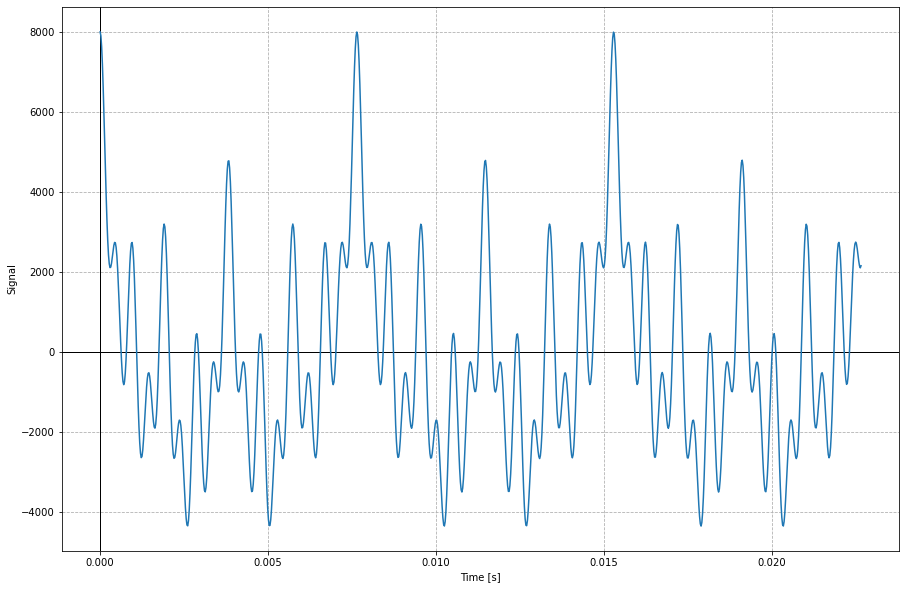

In [34]:
plot_ct_signal(t,x_t)

### b. Fourier Series Coefficients of the 1000 samples in frequency domain

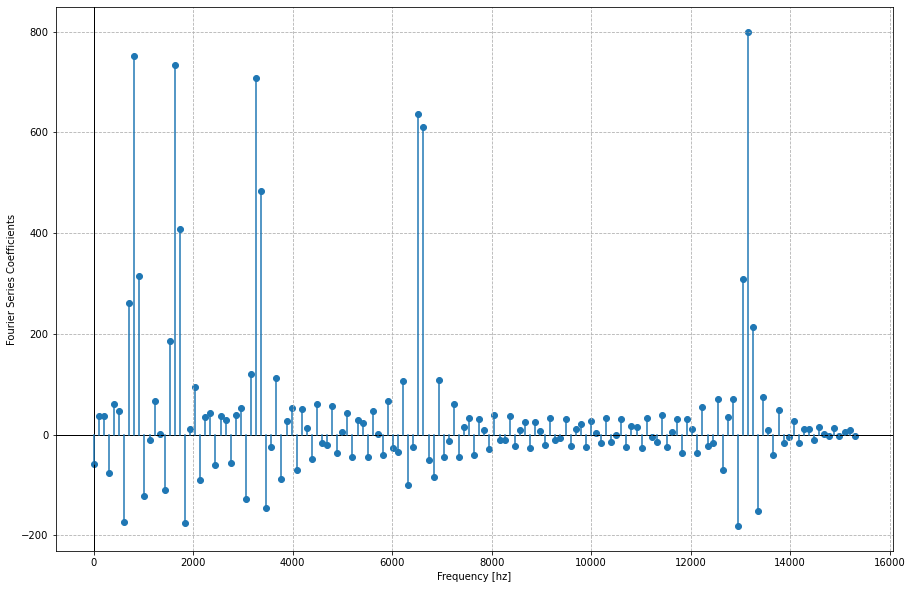

In [35]:
T = 0.06161
ak_arr = get_ak(x_t, t, T, 0, 150)
ak_range = np.array([k*2*np.pi/T for k in range(0, 150+1)])

plot_dt_signal(ak_range, ak_arr)

### c. Audio signal in frequency domain

/home/ali/miniconda3/envs/my-env/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/ali/miniconda3/envs/my-env/lib/python3.9/site-packages/numpy/core/_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


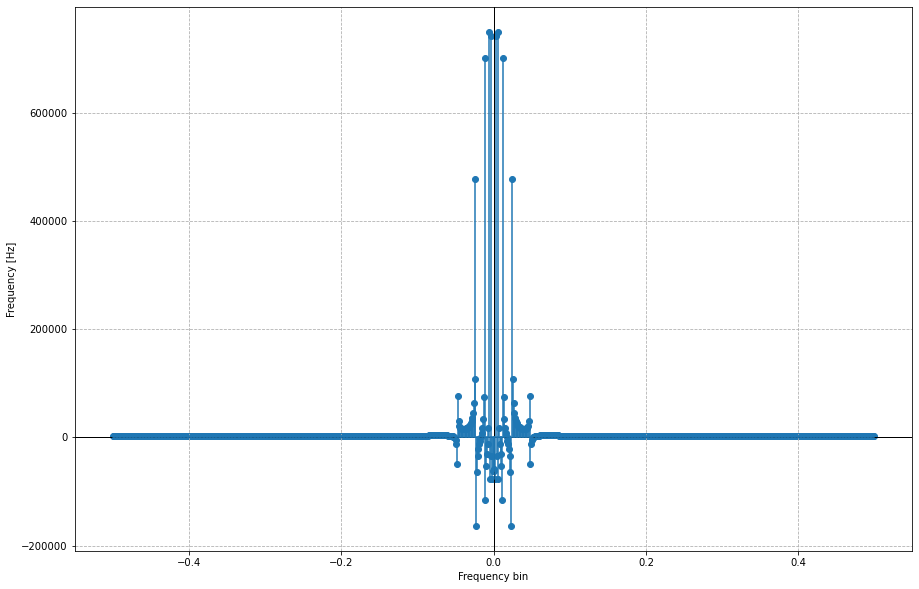

In [36]:
freq_bin = np.fft.fftfreq(t.shape[-1])
freq = np.fft.fft(x_t)

plot_dt_signal(freq_bin,freq, x_label='Frequency bin', y_label='Frequency [Hz]')

### d. Filter some of the frequencies

#### 1. Remove all frequencies except the two first ones

/home/ali/miniconda3/envs/my-env/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


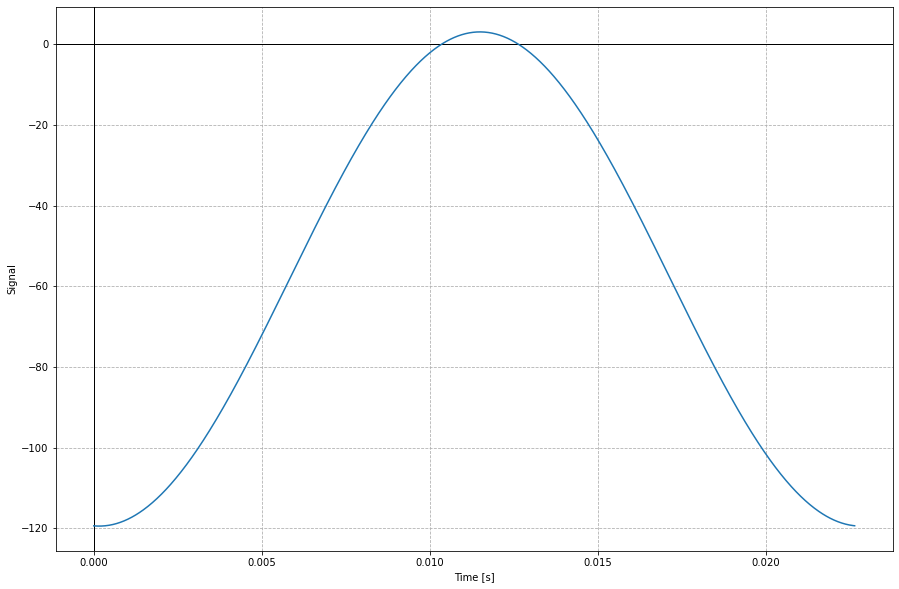

In [37]:
freq_bin = np.fft.fftfreq(t.shape[-1])
freq = np.fft.fft(x_t)
freq[-(len(freq)-2):]=0
new_x_t = np.fft.ifft(freq) 
plot_ct_signal(t, new_x_t)

#### 2. Remove all frequencies except the two last ones

/home/ali/miniconda3/envs/my-env/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


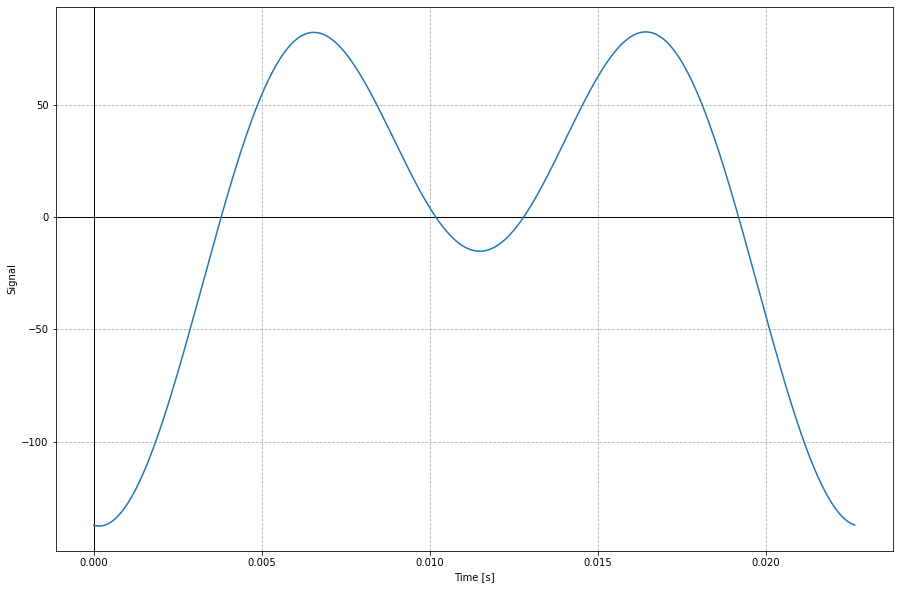

In [38]:
freq_bin = np.fft.fftfreq(t.shape[-1])
freq = np.fft.fft(x_t)
freq[:len(freq)-2]=0
new_x_t = np.fft.ifft(freq) 
plot_ct_signal(t, new_x_t)

### e. Converting the filtered signals to audio signals

In [39]:
from scipy.io.wavfile import write
from scipy.fft import fft, ifft

In [40]:
t = (np.arange(0, length , step=sample_step))
max_elemenet=max(data)
x_t = data/max_elemenet

In [41]:
freq = fft(x_t)
freq[:len(freq)-2]=0
new_x_t = ifft(freq) 

write("1.wav", sample_rate, new_x_t.real.astype(np.float32))

In [42]:
freq = np.fft.fft(x_t)
freq[-(len(freq)-2):]=0
new_x_t = np.fft.ifft(freq) 

write("2.wav", sample_rate, new_x_t.real.astype(np.float32))